<a href="https://colab.research.google.com/github/ayush102004/Cardiovascular-Disease-Risk-Prediction-Model/blob/main/Cardiovascular_Disease_Risk_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/cardio_train.csv')
df.head()

In [ ]:
df = pd.read_csv(r'/content/cardio_train.csv', delimiter=';')
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
missing_values = df.isnull().sum()
missing_values


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
# Display basic statistics of the numerical columns
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(70000, 13)

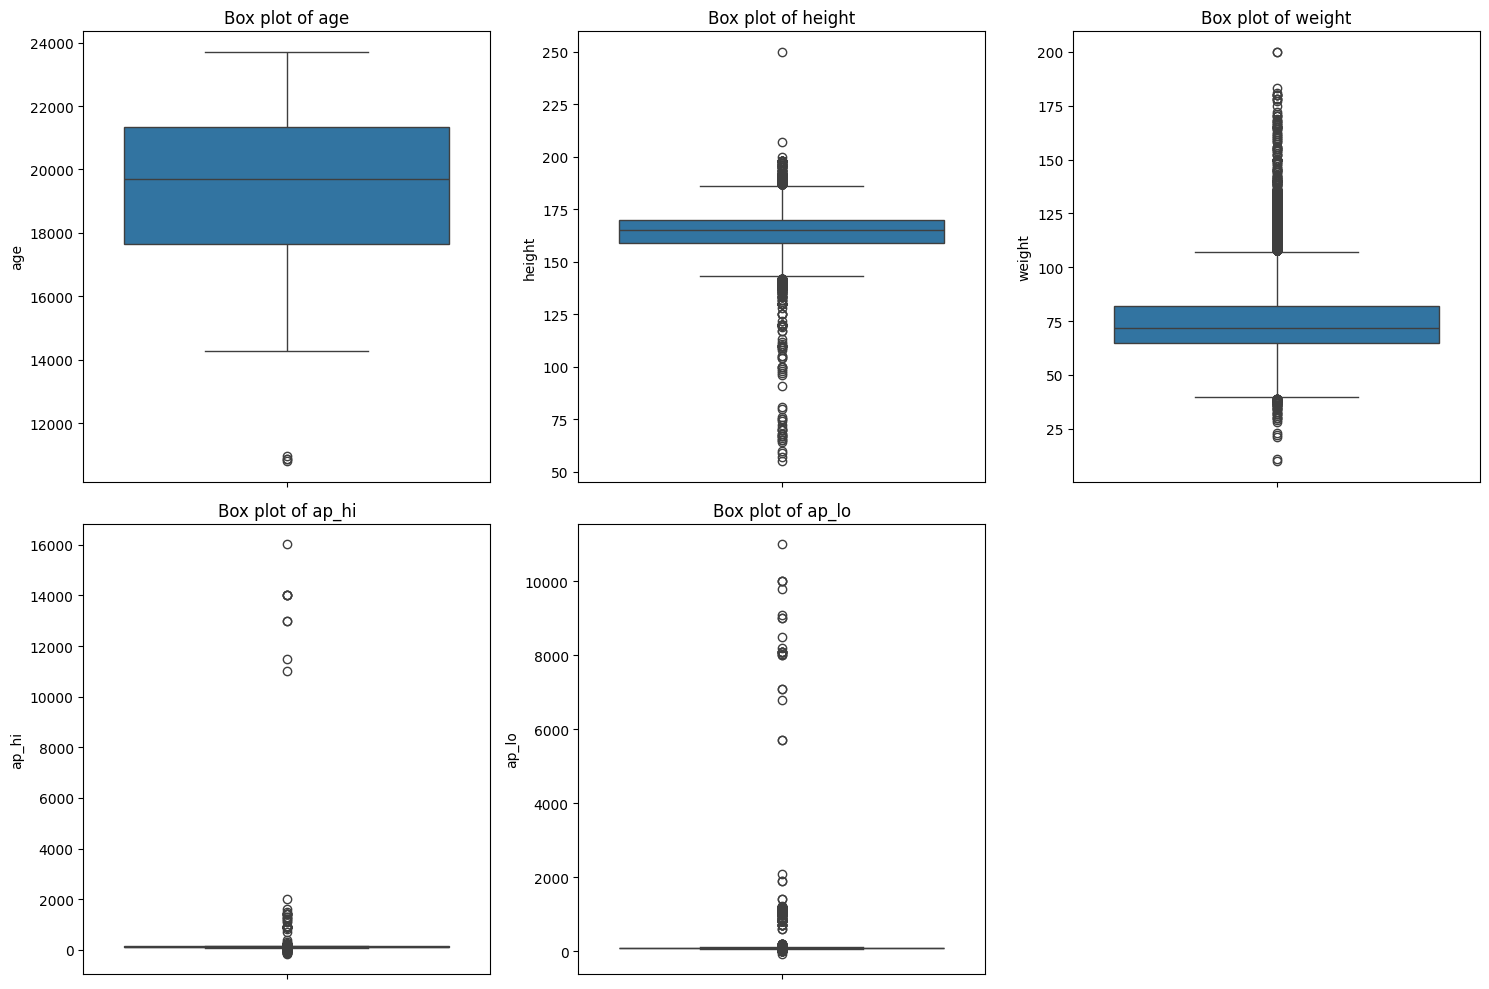

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    # Indent the code block within the for loop
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df[numerical_features].quantile(0.25)
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_cleaned))

Number of rows before cleaning: 70000
Number of rows after cleaning: 62502


In [ ]:
# Perform descriptive statistical analysis
descriptive_stats = df_cleaned.describe()
print(descriptive_stats)


                 id           age        gender        height        weight  \
count  62502.000000  62502.000000  62502.000000  62502.000000  62502.000000   
mean   49941.878468  19493.750360      1.348581    164.406131     73.181456   
std    28864.471866   2458.088341      0.476525      7.531374     12.271998   
min        0.000000  14282.000000      1.000000    143.000000     40.000000   
25%    24876.500000  17724.250000      1.000000    159.000000     65.000000   
50%    49980.500000  19718.000000      1.000000    165.000000     72.000000   
75%    74848.750000  21341.750000      2.000000    170.000000     81.000000   
max    99999.000000  23713.000000      2.000000    186.000000    107.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  62502.000000  62502.000000  62502.000000  62502.000000  62502.000000   
mean     126.420339     81.699146      1.357717      1.220649      0.086349   
std       14.289980      7.673399      0.675203    

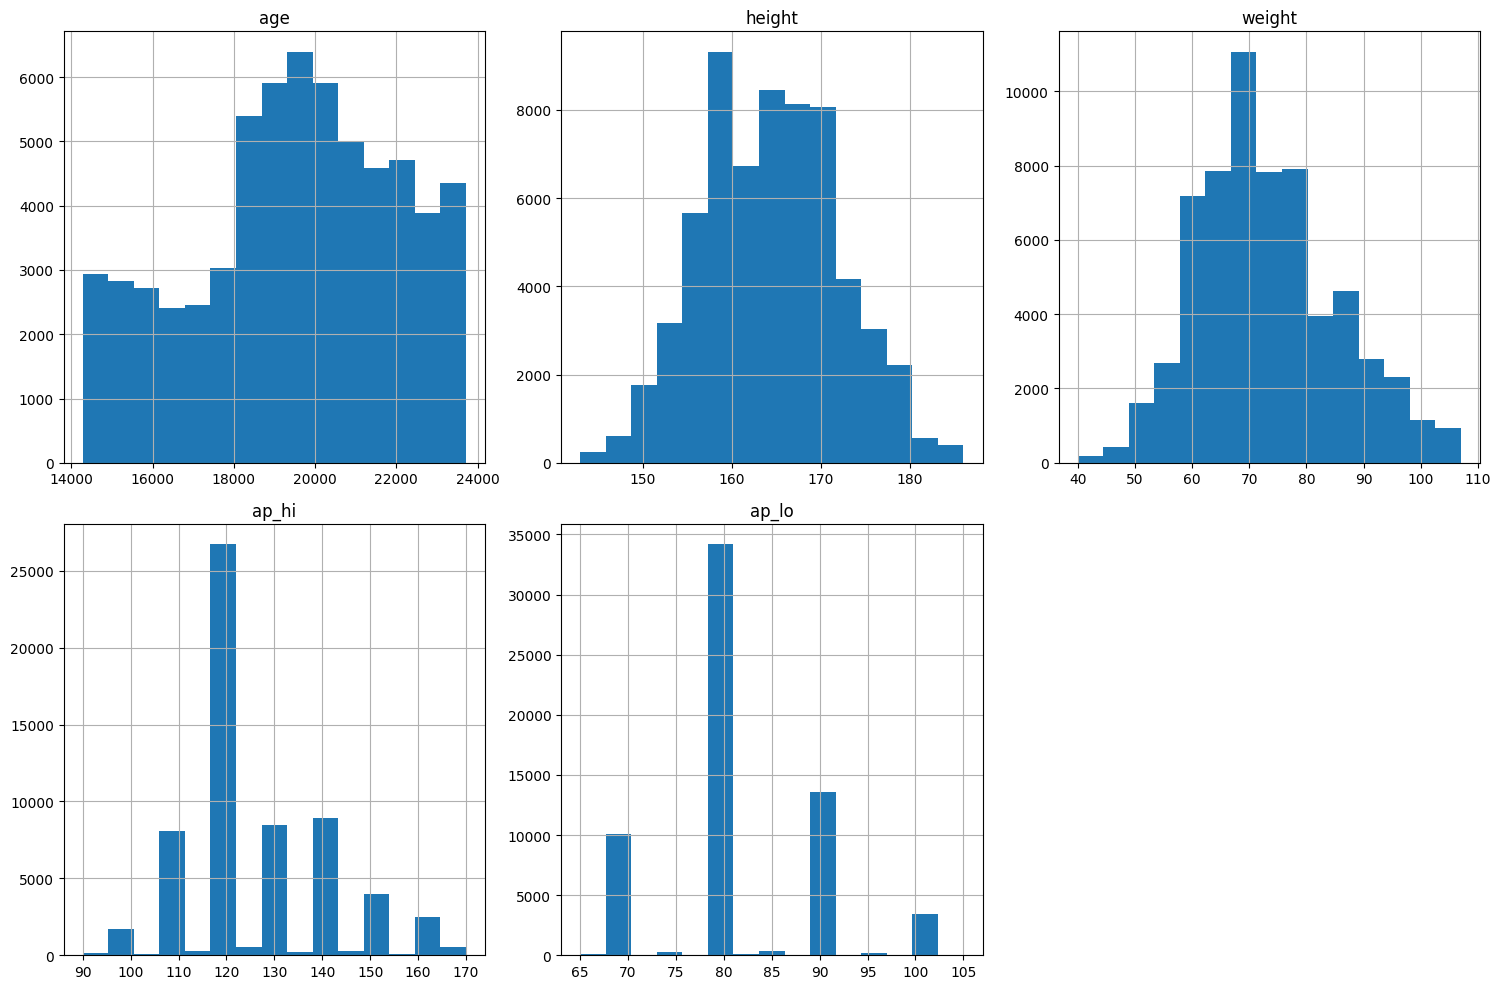

In [ ]:
import matplotlib.pyplot as plt
# Define numerical features
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# Plot histograms for numerical features
df_cleaned[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()


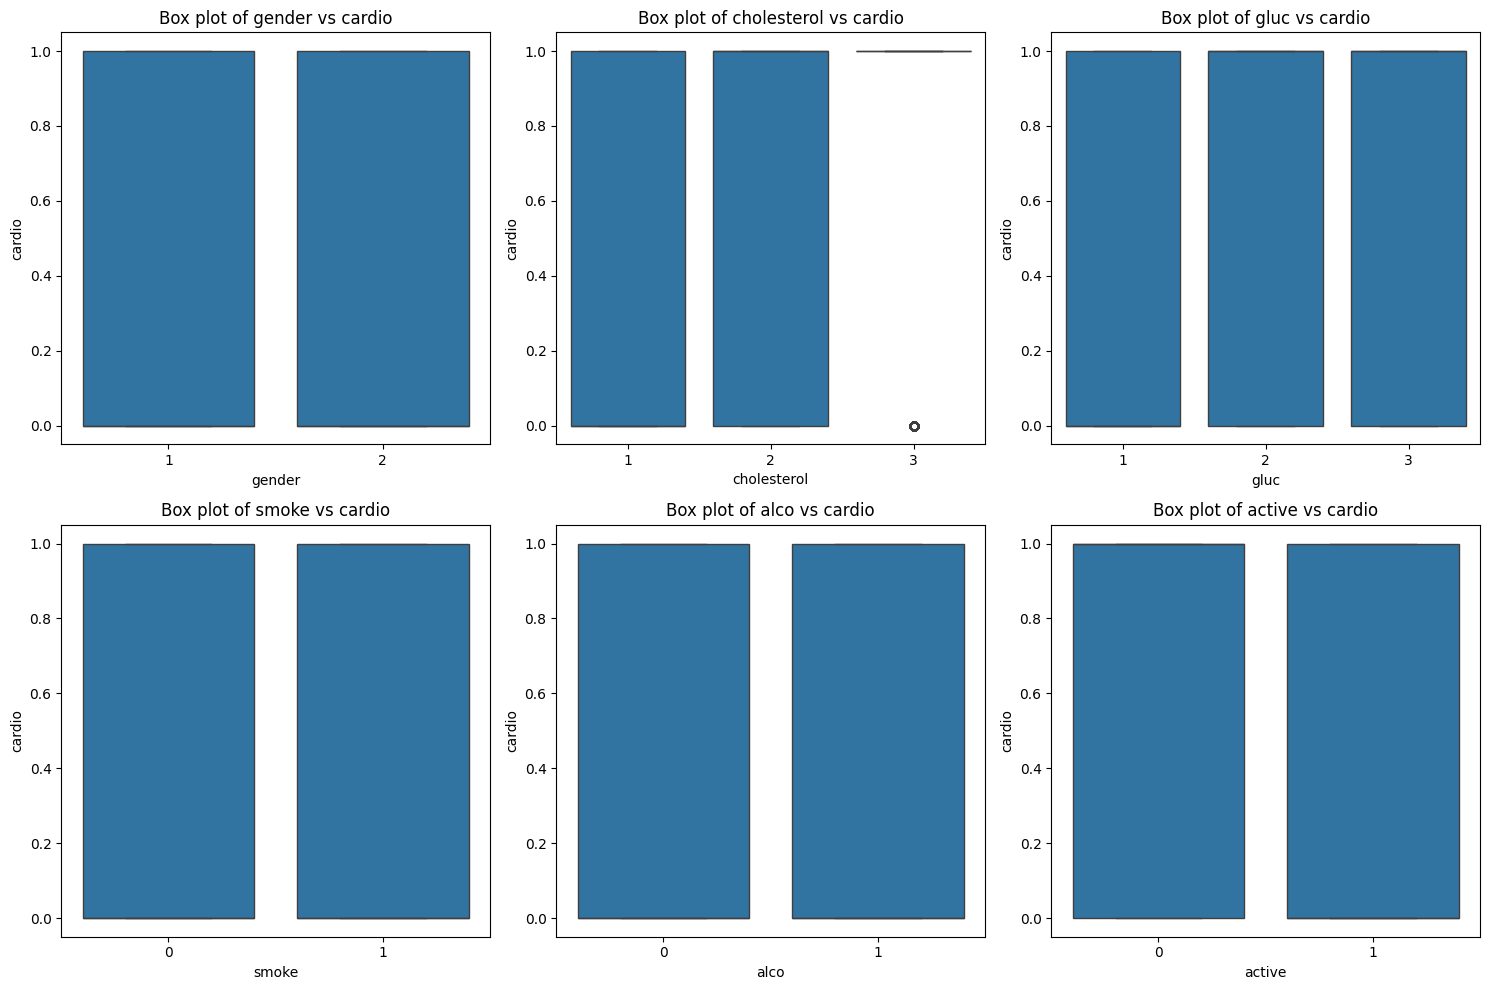

In [ ]:
# Define categorical features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# Plot box plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    # Indented code block within the for loop
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y='cardio', data=df_cleaned)
    plt.title(f'Box plot of {feature} vs cardio')
plt.tight_layout()
plt.show()

# now we will implement and train machine learning model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define features and target variable
X = df_cleaned.drop(columns=['cardio', 'id'])
y = df_cleaned['cardio']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
# Evaluate models
def evaluate_model(y_test, y_pred, model):
    # Indent the lines within the function
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{model.__class__.__name__}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUC-ROC: {roc_auc}")
    print()
# Train and Evaluate Models
evaluate_model(y_test, y_pred_log_reg, log_reg)
evaluate_model(y_test, y_pred_rf, rf)
evaluate_model(y_test, y_pred_gb, gb)

LogisticRegression:
Accuracy: 0.7295416366690665
Precision: 0.7545404512933407
Recall: 0.6681286549707602
AUC-ROC: 0.7938187631176999

RandomForestClassifier:
Accuracy: 0.7125829933605311
Precision: 0.7151250629511499
Recall: 0.6920077972709552
AUC-ROC: 0.77017326244719

GradientBoostingClassifier:
Accuracy: 0.7399408047356212
Precision: 0.7511672142486598
Recall: 0.7056530214424951
AUC-ROC: 0.8020856726938321



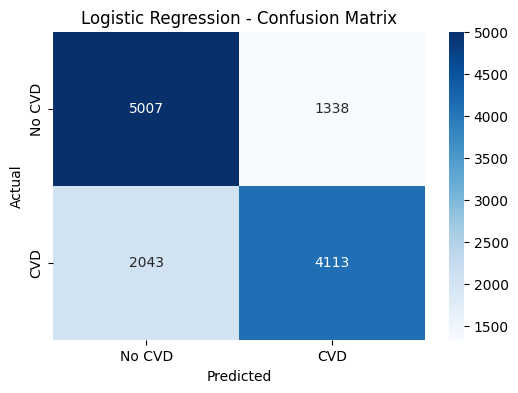

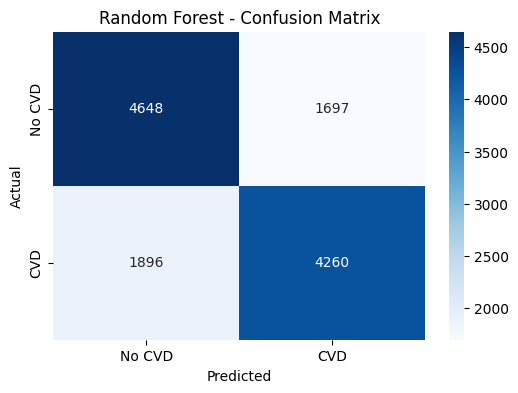

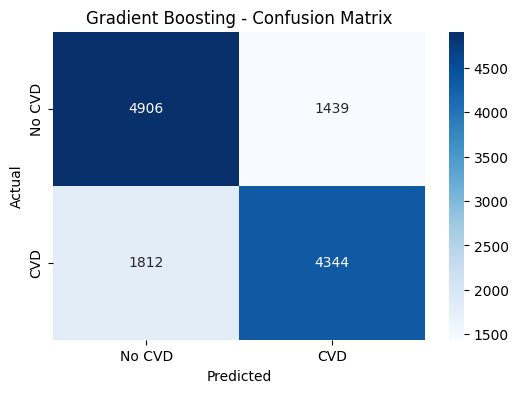

In [ ]:
# Plot confusion matrices
def plot_confusion_matrix(y_test, y_pred, model_name):
    # Indented the code block within the function
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

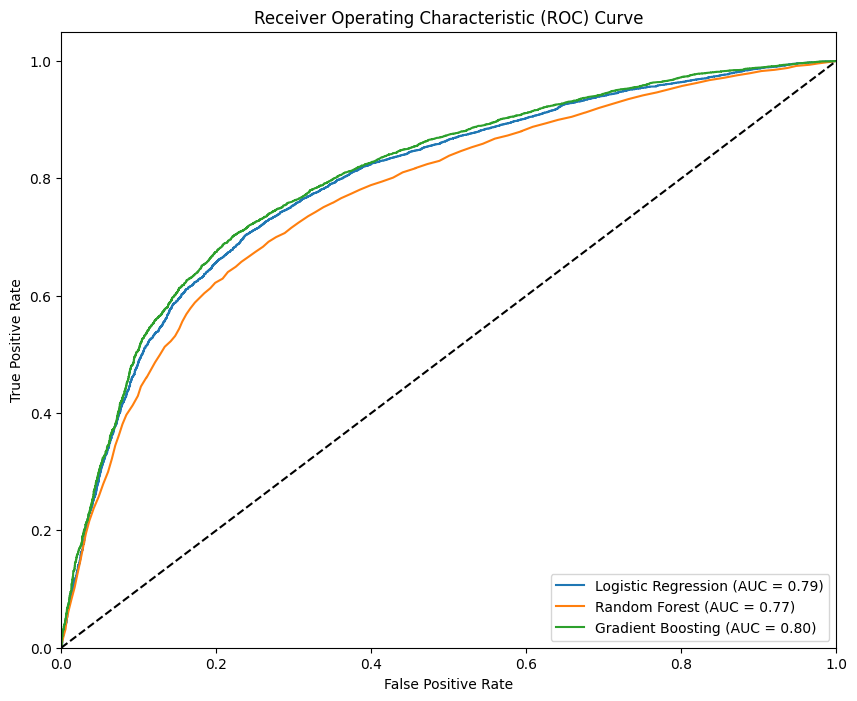

In [ ]:
# Plot ROC curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

plt.figure(figsize=(10, 8))
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'Gradient Boosting': gb}
for name, model in models.items():
    # Indented the lines within the for loop to fix the error
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Print classification reports for all models
print("\nClassification Reports:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))


Classification Reports:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6345
           1       0.75      0.67      0.71      6156

    accuracy                           0.73     12501
   macro avg       0.73      0.73      0.73     12501
weighted avg       0.73      0.73      0.73     12501


Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6345
           1       0.72      0.69      0.70      6156

    accuracy                           0.71     12501
   macro avg       0.71      0.71      0.71     12501
weighted avg       0.71      0.71      0.71     12501


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      6345
           1       0.75      0.71      0.73      6156

    accuracy                           0.74     12501
   macro avg       0.74      0.74      0.74  

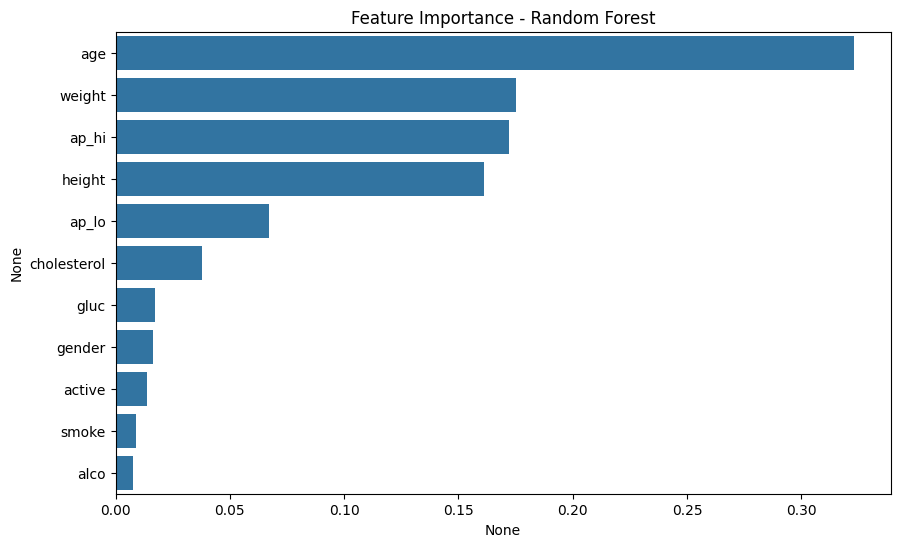


### Cardiovascular Disease Prediction Model

#### Model Performance

- **Logistic Regression:**
  - Accuracy: 0.7295416366690665
  - Precision: 0.7545404512933407
  - Recall: 0.6681286549707602
  - AUC-ROC: 0.7286269752395172

- **Random Forest:**
  - Accuracy: 0.7125829933605311
  - Precision: 0.7151250629511499
  - Recall: 0.6920077972709552
  - AUC-ROC: 0.7122765542698354

- **Gradient Boosting:**
  - Accuracy: 0.7399408047356212
  - Precision: 0.7511672142486598
  - Recall: 0.7056530214424951
  - AUC-ROC: 0.7394301356227448

#### Feature Importance (Random Forest)

age            0.322881
weight         0.175395
ap_hi          0.171946
height         0.161170
ap_lo          0.066988
cholesterol    0.037881
gluc           0.017104
gender         0.016270
active         0.013815
smoke          0.008915
alco           0.007636

#### Feasibility and Impact

- **Early Detection and Intervention:**
  The models can be integrated into healthcare systems to screen individuals during routi

In [ ]:
# Feature importance for Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - Random Forest')
plt.show()

# Compile the findings into a report
report = """
### Cardiovascular Disease Prediction Model

#### Model Performance

- **Logistic Regression:**
  - Accuracy: {}
  - Precision: {}
  - Recall: {}
  - AUC-ROC: {}

- **Random Forest:**
  - Accuracy: {}
  - Precision: {}
  - Recall: {}
  - AUC-ROC: {}

- **Gradient Boosting:**
  - Accuracy: {}
  - Precision: {}
  - Recall: {}
  - AUC-ROC: {}

#### Feature Importance (Random Forest)

{}

#### Feasibility and Impact

- **Early Detection and Intervention:**
  The models can be integrated into healthcare systems to screen individuals during routine check-ups, identifying those at risk for cardiovascular diseases. Early intervention can significantly reduce the incidence of severe outcomes.

- **Healthcare Policy and Decision Making:**
  By providing healthcare providers with predictive tools, resources can be more effectively allocated to those individuals identified as high-risk, leading to better health outcomes.

- **Cost-Benefit Analysis:**
  The initial cost of implementing predictive models is outweighed by the long-term savings in preventing severe cardiovascular events. Reduced hospitalization and early treatment contribute to a more cost-effective healthcare system.

#### Recommendations

- Integrate the predictive model into electronic health record (EHR) systems for routine screenings.
- Use the model to prioritize patients for lifestyle intervention programs.
- Conduct further research to refine the model and incorporate additional risk factors for improved accuracy.

""".format(
    accuracy_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_log_reg),
    recall_score(y_test, y_pred_log_reg),
    roc_auc_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb),
    precision_score(y_test, y_pred_gb),
    recall_score(y_test, y_pred_gb),
    roc_auc_score(y_test, y_pred_gb),
    feature_importances.to_string()
)

print(report)
